In [47]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [48]:
words=open('indian_names.txt','r').read().splitlines()
len(words)

6487

In [49]:
chs=sorted(list(set(''.join(words))))
stoi={s:i for i,s in enumerate(chs)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)
    

{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [ ]:
block_size=3 # context length i.e from how many chars we predict the next one
x,y=[],[] 
for w in words:
    # print(w)
    context=[0]*block_size #initially it has context 3
    for ch in w+'.':
        ix=stoi[ch]
        x.append(context)
        y.append(ix)
        # print(''.join((itos[i]) for i in context),'----->',itos[ix]) #converts the context into the list
        context=context[1:]+[ix] # to remove the first element and add the new element in the last to update the context

x=torch.tensor(x)
y=torch.tensor(y)


aabod
... -----> a
..a -----> a
.aa -----> b
aab -----> o
abo -----> d
bod -----> .
aabid
... -----> a
..a -----> a
.aa -----> b
aab -----> i
abi -----> d
bid -----> .
aabida
... -----> a
..a -----> a
.aa -----> b
aab -----> i
abi -----> d
bid -----> a
ida -----> .
aachal
... -----> a
..a -----> a
.aa -----> c
aac -----> h
ach -----> a
cha -----> l
hal -----> .
aadesh
... -----> a
..a -----> a
.aa -----> d
aad -----> e
ade -----> s
des -----> h
esh -----> .
aadil
... -----> a
..a -----> a
.aa -----> d
aad -----> i
adi -----> l
dil -----> .
aadish
... -----> a
..a -----> a
.aa -----> d
aad -----> i
adi -----> s
dis -----> h
ish -----> .
aaditya
... -----> a
..a -----> a
.aa -----> d
aad -----> i
adi -----> t
dit -----> y
ity -----> a
tya -----> .
aaenab
... -----> a
..a -----> a
.aa -----> e
aae -----> n
aen -----> a
ena -----> b
nab -----> .
aafreen
... -----> a
..a -----> a
.aa -----> f
aaf -----> r
afr -----> e
fre -----> e
ree -----> n
een -----> .
aafrin
... -----> a
..a -----> a
.

In [51]:
x.shape ,x.dtype ,y.shape,y.dtype

(torch.Size([47706, 3]), torch.int64, torch.Size([47706]), torch.int64)

In [52]:
C=torch.randn(27,2).float() #look up table 
C

tensor([[ 1.2871,  0.5211],
        [ 0.3380,  0.0480],
        [ 1.1548, -0.3148],
        [-0.2326,  0.2521],
        [ 0.6125,  0.4239],
        [-1.6483,  0.0113],
        [ 1.0073, -1.6954],
        [-1.1810,  0.4829],
        [-0.2886, -3.6063],
        [-0.5837, -0.4959],
        [ 0.7889, -0.2179],
        [ 0.8766,  0.3230],
        [ 1.2737, -0.2181],
        [-1.2207, -1.2792],
        [-0.4438, -0.5473],
        [-0.1577,  1.2843],
        [-0.9835,  0.2066],
        [-0.1560, -1.6142],
        [-0.5257, -1.3383],
        [ 0.2239, -0.7940],
        [ 0.4469, -0.6630],
        [ 1.9821, -0.5368],
        [ 1.0361,  1.9725],
        [ 0.7778,  0.0711],
        [ 0.5902, -0.5061],
        [-0.9117, -0.3638],
        [-0.3562, -0.4501]])

In [53]:
C[5]

tensor([-1.6483,  0.0113])

In [54]:
C[[5,6,7]] # call with a list of value

tensor([[-1.6483,  0.0113],
        [ 1.0073, -1.6954],
        [-1.1810,  0.4829]])

In [55]:
C[x] #X as a value passes to C

tensor([[[ 1.2871,  0.5211],
         [ 1.2871,  0.5211],
         [ 1.2871,  0.5211]],

        [[ 1.2871,  0.5211],
         [ 1.2871,  0.5211],
         [ 0.3380,  0.0480]],

        [[ 1.2871,  0.5211],
         [ 0.3380,  0.0480],
         [ 0.3380,  0.0480]],

        ...,

        [[-0.3562, -0.4501],
         [ 1.9821, -0.5368],
         [ 1.0361,  1.9725]],

        [[ 1.9821, -0.5368],
         [ 1.0361,  1.9725],
         [-1.6483,  0.0113]],

        [[ 1.0361,  1.9725],
         [-1.6483,  0.0113],
         [ 1.1548, -0.3148]]])

In [56]:
# emb=C[x]plt.plot(lri,lossi)

In [57]:
# torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape # its only for fixed block size 3


In [58]:
W1=torch.randn(6,100)
b1=torch.randn(100)

In [59]:
# emb=torch.cat(torch.unbind(emb,1),1).shape # for all block size

In [60]:
emb=C[x]

In [61]:
h=torch.tanh(emb.view(-1,6) @ W1 + b1) # -1 for any value in x like 32
h

tensor([[ 0.9898,  0.9982,  0.8038,  ...,  0.7821, -0.1681,  0.9730],
        [ 0.9414,  0.9862, -0.6196,  ...,  0.7388, -0.5101,  0.9076],
        [-0.0885,  0.5418, -0.7908,  ...,  0.5638, -0.6862,  0.8224],
        ...,
        [ 0.9957,  0.9955,  0.8090,  ...,  0.9815,  0.9997,  0.1076],
        [-0.0764,  0.9806, -0.9840,  ..., -0.1771,  0.4294,  0.9822],
        [-0.8368, -0.9920,  0.0030,  ...,  0.1839, -0.9879,  0.9013]])

In [62]:
W2=torch.randn(100,27)
b2=torch.randn(27)
logits=h @ W2 + b2 #softmax function
counts=logits.log() #finding fake counts to normalize the values
prob=counts/counts.sum(1,keepdim=True)
#instead of using the 3 lines ,we use cross entropy to execute the softmax function
prob.shape

torch.Size([47706, 27])

In [63]:
y

tensor([1, 1, 2,  ..., 5, 2, 0])

In [64]:
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,10),generator =g ,requires_grad=True)
W1=torch.randn((30,200),generator=g)
b1=torch.randn((200),generator=g)
W2=torch.randn((200,27),generator=g)
b2=torch.randn((27),generator=g)
parameters=[C,W1,b1,W2,b2]

In [65]:
sum(p.nelement() for p in parameters)

11897

In [66]:
for p in parameters:
    p.requires_grad=True

In [67]:
# for _ in range(100):
#     #forward pass
#     emb=C[x]
#    print(''.join((itos[i]) for i in context),'----->',itos[ix])   h=torch.tanh(emb.view(-1,6) @ W1 + b1)
#     logits=h @ W2 + b2
#     loss=F.cross_entropy(logits,y)
#     print(loss.item())
#     #backward pass
#     for p in parameters:
#          p.grad=None
#     loss.backward()
#     #update
#     for p in parameters:
#          p.data+=-0.1*p.grad
# print(loss.item())


In [68]:
torch.randint(0,5,(32,))


tensor([1, 0, 1, 1, 3, 2, 4, 0, 1, 0, 0, 2, 3, 2, 1, 2, 3, 2, 1, 4, 4, 4, 3, 4,
        0, 3, 2, 0, 0, 3, 2, 0])

In [69]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre

In [107]:
# using xtr and ytr
lri=[]
lossi=[]
stepi=[]
for i in range(50000):
    ix=torch.randint(0,xtr.shape[0],(32,)) #mini batch constructed
    emb=C[xtr[ix]] #32,3,2 
    h=torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits=h @ W2 + b2
    loss=F.cross_entropy(logits,ytr[ix])
#     print(loss.item())
    #backward pass
    for p in parameters:
         p.grad=None
    loss.backward()
    #update
    lr=0.01
    for p in parameters:
         p.data+=-lr*p.grad
    # lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)
# print(loss.item())



In [108]:
loss

tensor(2.0050, grad_fn=<NllLossBackward0>)

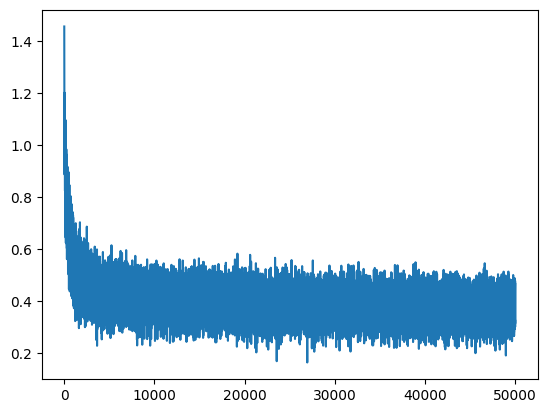

In [72]:
plt.plot(stepi,lossi)

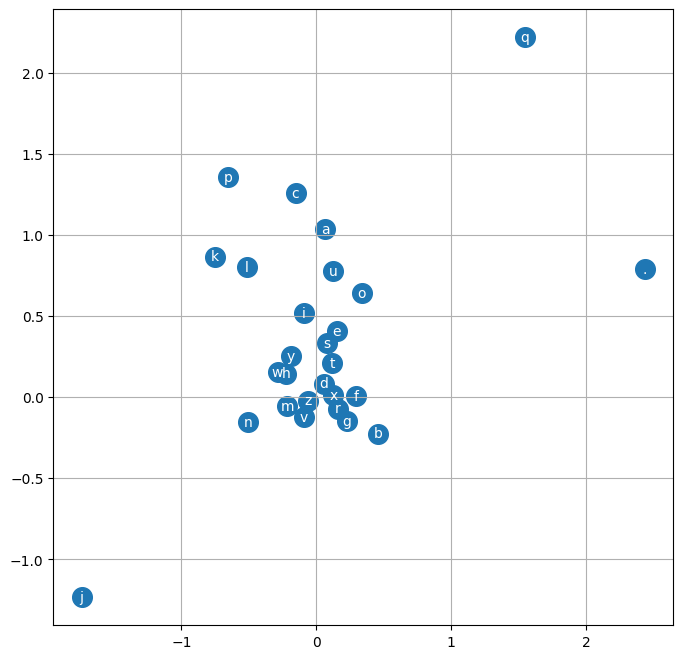

In [73]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [105]:
ix=torch.randint(0,xdev.shape[0],(32,)) #mini batch constructed
emb=C[xdev[ix]] #32,3,2 
h=torch.tanh(emb.view(-1,30) @ W1 + b1)
logits=h @ W2 + b2
loss=F.cross_entropy(logits,ydev[ix])
loss


tensor(2.2944, grad_fn=<NllLossBackward0>)

In [106]:
ix=torch.randint(0,xte.shape[0],(32,)) #mini batch constructed
emb=C[xte[ix]] #32,3,2 
h=torch.tanh(emb.view(-1,30) @ W1 + b1)
logits=h @ W2 + b2
loss=F.cross_entropy(logits,yte[ix])
loss


tensor(2.0709, grad_fn=<NllLossBackward0>)

In [76]:
# plt.plot(lri,lossi)

In [77]:
# to avoid overfiting
# #80% - training split
#10% - dev/validation split
#10% - test split

In [ ]:
#creating a dataset
def build_dataset(words): #TO split in three parts
    block_size=3 # context length i.e from how many chars we predict the next one
    x,y=[],[] 
    for w in words:
       print(w)
       context=[0]*block_size #initially it has context 3
       for ch in w+'.':
          ix=stoi[ch]
          x.append(context)
          y.append(ix)
        #   print(''.join((itos[i]) for i in context),'----->',itos[ix])   #converts the context into the list
          context=context[1:]+[ix] # to remove the first element and add the new element in the last to update the context
    x=torch.tensor(x)
    y=torch.tensor(y)
    print(x.shape,y.shape)
    return x,y
import random
random.seed(42)
random.shuffle(words) # shuffle all the words in a particular ordergit config --global
n1=int(0.8*len(words)) #0.8 * 32000=28000 (app)
n2=int(0.9*len(words)) #0.9 * 32000=25000
xtr,ytr=build_dataset(words[:n1])
xdev,ydev=build_dataset(words[n1:n2]) #n1-n2
xte,yte=build_dataset(words[n2:])


ikara
... -----> i
..i -----> k
.ik -----> a
ika -----> r
kar -----> a
ara -----> .
shardanand
... -----> s
..s -----> h
.sh -----> a
sha -----> r
har -----> d
ard -----> a
rda -----> n
dan -----> a
ana -----> n
nan -----> d
and -----> .
anirudh
... -----> a
..a -----> n
.an -----> i
ani -----> r
nir -----> u
iru -----> d
rud -----> h
udh -----> .
chran
... -----> c
..c -----> h
.ch -----> r
chr -----> a
hra -----> n
ran -----> .
rashmi
... -----> r
..r -----> a
.ra -----> s
ras -----> h
ash -----> m
shm -----> i
hmi -----> .
tisha
... -----> t
..t -----> i
.ti -----> s
tis -----> h
ish -----> a
sha -----> .
ajeem
... -----> a
..a -----> j
.aj -----> e
aje -----> e
jee -----> m
eem -----> .
rahi
... -----> r
..r -----> a
.ra -----> h
rah -----> i
ahi -----> .
ovaish
... -----> o
..o -----> v
.ov -----> a
ova -----> i
vai -----> s
ais -----> h
ish -----> .
aradhana
... -----> a
..a -----> r
.ar -----> a
ara -----> d
rad -----> h
adh -----> a
dha -----> n
han -----> a
ana -----> .
sajida

In [79]:
xte.shape,yte.shape

(torch.Size([4731, 3]), torch.Size([4731]))

In [110]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(50):
    
    out = []
    context = [0] * block_size #initialize blocksize
    while True:
      emb = C[torch.tensor([context])] 
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mohail.
yan.
seen.
niha.
amarendra.
badra.
guldeep.
seli.
jeni.
pen.
misingh.
parshamtukmanta.
miysarbargahimansh.
jair.
jeet.
jatpal.
subangeet.
samdul.
mha.
kar.
mustkida.
him.
sak.
ansu.
puri.
lakunen.
che.
nimakish.
prad.
rahika.
shandpriya.
fareem.
khurendri.
asiri.
choturalam.
intarati.
meen.
isthalita.
kavishivin.
meenaketan.
vishabitud.
mantesh.
kamim.
tul.
rite.
biha.
mrit.
ajal.
parmnisto.
prtamina.
